<a href="https://colab.research.google.com/github/jaesuun/sjtg_project/blob/main/mission1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 압축풀기

In [1]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/데이터셋
!unzip -qq "/content/drive/MyDrive/데이터셋/kfood_val.zip"

/content/drive/MyDrive/데이터셋
replace val/생선전/Img_102_0283.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
import os

# 압축 파일이 해제된 폴더 경로
extracted_folder = "/content/drive/MyDrive/데이터셋/val"

# 해당 폴더 내의 파일 수 확인
file_count = len(os.listdir(extracted_folder))

print("압축 해제된 폴더 내의 파일 수:", file_count)


압축 해제된 폴더 내의 파일 수: 42


##val 시각화

In [14]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [15]:
dir_ = Path('/content/drive/MyDrive/데이터셋/val')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(filepaths)
df.head

<bound method NDFrame.head of                                                Filepath       Label
0     /content/drive/MyDrive/데이터셋/val/황태구이...   황태구이
1     /content/drive/MyDrive/데이터셋/val/송편/Im...      송편
2     /content/drive/MyDrive/데이터셋/val/떡갈비/...    떡갈비
3     /content/drive/MyDrive/데이터셋/val/시래기국...   시래기국
4     /content/drive/MyDrive/데이터셋/val/꿀떡/Im...      꿀떡
...                                                 ...         ...
4114  /content/drive/MyDrive/데이터셋/val/계란말ᄋ...  계란말이
4115  /content/drive/MyDrive/데이터셋/val/북엇국...   북엇국
4116  /content/drive/MyDrive/데이터셋/val/훈제오리...   훈제오리
4117  /content/drive/MyDrive/데이터셋/val/감자전/...    감자전
4118  /content/drive/MyDrive/데이터셋/val/떡갈비/...    떡갈비

[4119 rows x 2 columns]>

In [16]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 4119

Number of different labels: 42

Labels: ['황태구이' '송편' '떡갈비' '시래기국' '꿀떡' '계란말이'
 '비빔밥' '유부초밥' '더덕구이' '조기구이' '김치볶음밥' '누룽지'
 '떡국_만두국' '알밥' '계란국' '김밥' '조개구이' '육개장'
 '호박전' '잡곡밥' '주먹밥' '장어구이' '무국' '갈치구이'
 '북엇국' '곱창구이' '새우볶음밥' '삼겹살' '파전' '감자전'
 '김치전' '생선전' '동그랑땡' '콩나물국' '경단' '훈제오리'
 '갈비구이' '고등어구이' '불고기' '닭갈비' '계란후라이' '미역국']


In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())


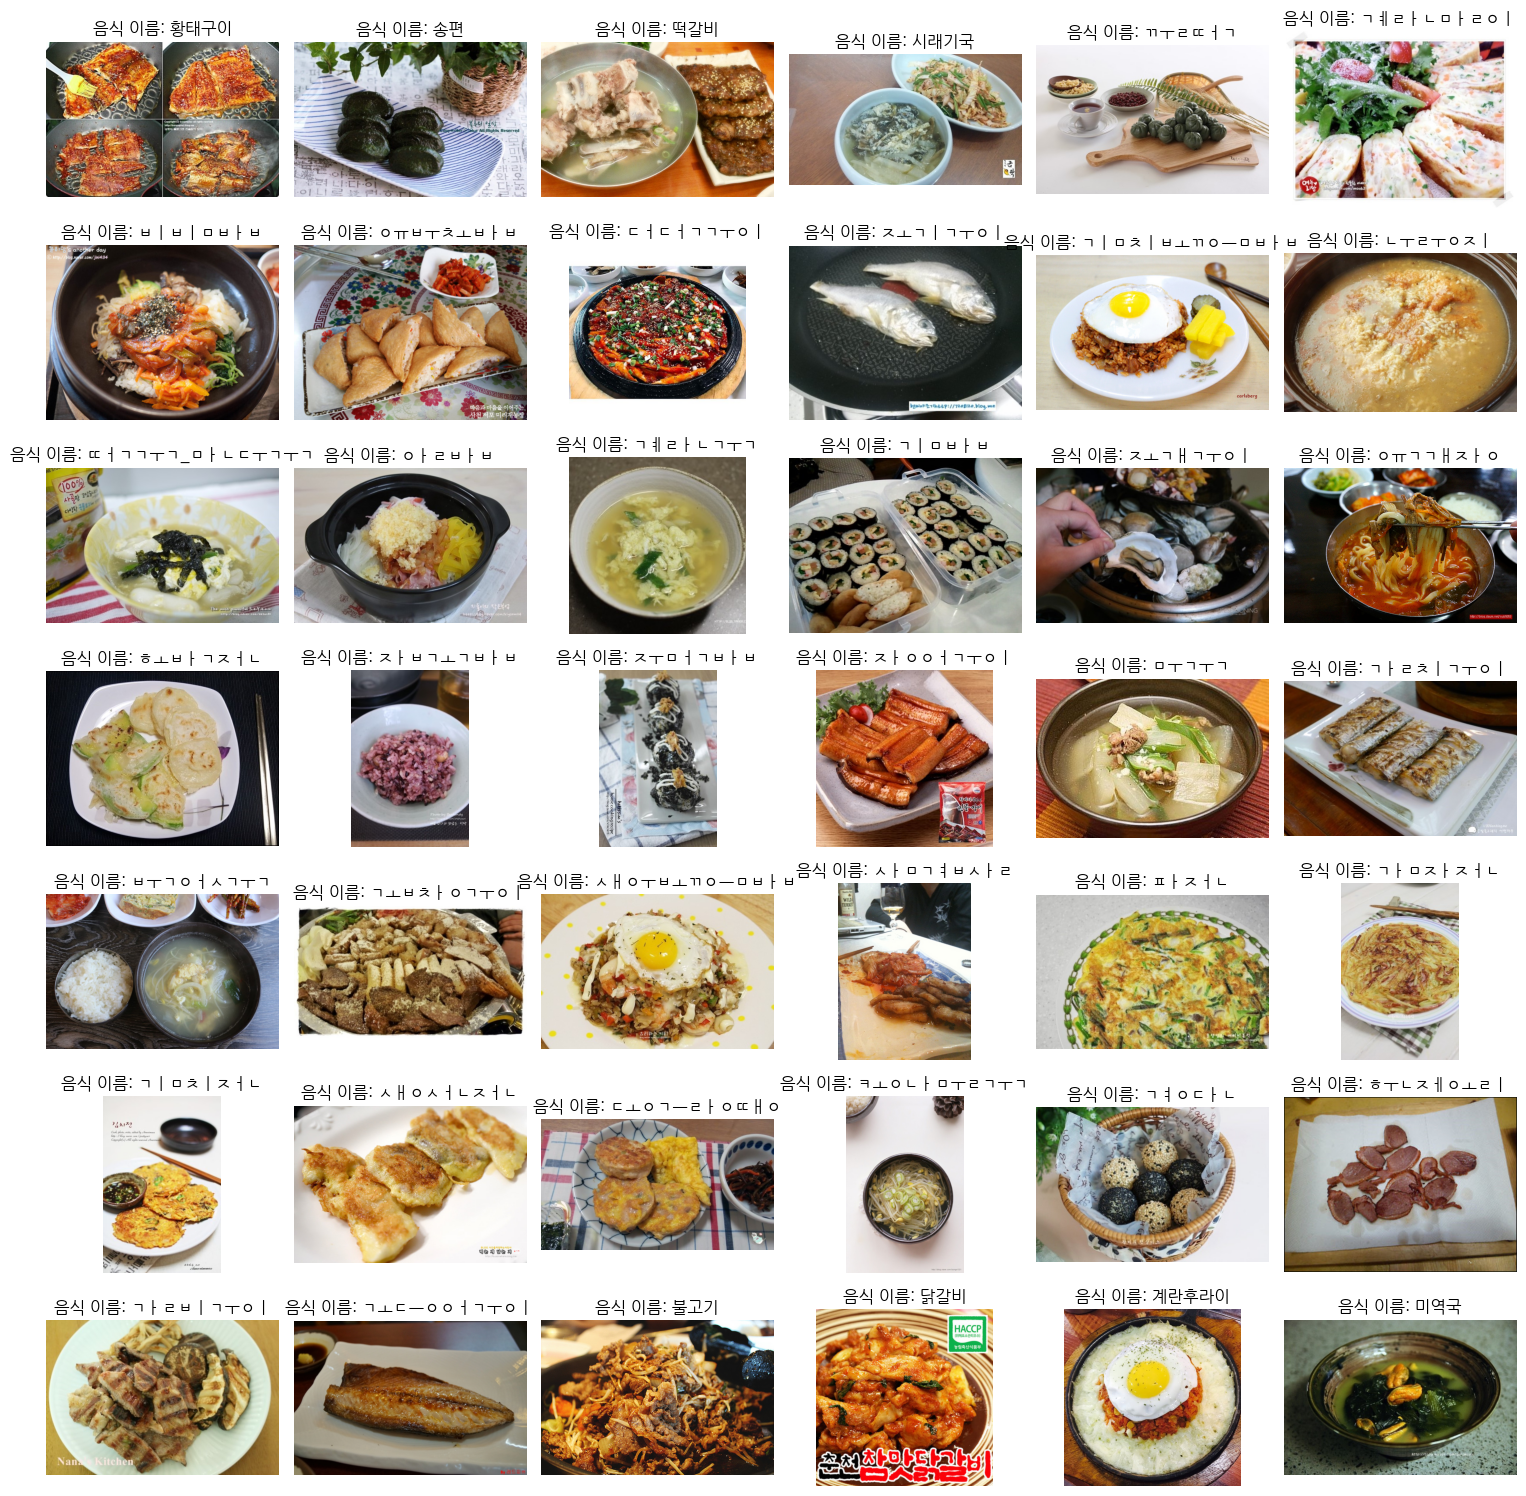

In [18]:
import matplotlib.pyplot as plt

# 라벨과 음식 이름 매핑
label_to_food = {
    '황태구이': '황태구이',
    '송편': '송편',
    '떡갈비': '떡갈비',
    '시래기국': '시래기국',
    '꿀떡': '꿀떡',
    '계란말이': '계란말이',
    '비빔밥': '비빔밥',
    '유부초밥': '유부초밥',
    '더덕구이': '더덕구이',
    '조기구이': '조기구이',
    '김치볶음밥': '김치볶음밥',
    '누룽지': '누룽지',
    '호박전': '호박전',
    '잡곡밥': '잡곡밥',
    '주먹밥': '주먹밥',
    '장어구이': '장어구이',
    '무국': '무국',
    '갈치구이': '갈치구이',
    '북엇국': '북엇국',
    '곱창구이': '곱창구이',
    '새우볶음밥': '새우볶음밥',
    '삼겹살': '삼겹살',
    '파전': '파전',
    '감자전': '감자전',
    '김치전': '김치전',
    '생선전': '생선전',
    '동그랑땡': '동그랑땡',
    '콩나물국': '콩나물국',
    '경단': '경단',
    '훈제오리': '훈제오리',
    '갈비구이': '갈비구이',
    '고등어구이': '고등어구이',
    '불고기': '불고기',
    '닭갈비': '닭갈비',
    '계란후라이': '계란후라이',
    '미역국': '미역국',
}

# 라벨 목록을 가져옵니다.
labels = df.Label.unique()

# 그림을 그릴 서브플롯 설정
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(15, 15))

for i, label in enumerate(labels):
    # 해당 라벨의 첫 번째 이미지 데이터를 가져옵니다.
    img_data = df[df['Label'] == label].iloc[0]

    # 이미지 파일 경로
    img_path = img_data['Filepath']

    # 이미지 불러오기
    img = plt.imread(img_path)

    # 라벨에 대응하는 음식 이름 가져오기 (매핑된 값 또는 라벨 자체)
    food_name = label_to_food.get(label, label)

    # 이미지 출력
    row = i // 6
    col = i % 6
    ax = axes[row, col]
    ax.imshow(img)
    ax.set_title(f'음식 이름: {food_name}')
    ax.axis('off')

# 남은 빈 서브플롯 숨기기
for i in range(len(labels), 42):
    row = i // 6
    col = i % 6
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
